1.Consumo di alcol per paese

In [ ]:
%conda install pandas
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

In [ ]:
df.head(10)

df.sort_values(by="total_litres_of_pure_alcohol", ascending=False,inplace=True)
print(df)
print("media della birra:",df['beer_servings'].mean())
print("media del vino:",df['wine_servings'].mean())
print("media dei distillati:",df['spirit_servings'].mean())

df['alcohol_index']=(df['beer_servings']+df['spirit_servings']+df['wine_servings'])
print(df)
print('Trova il paese con il valore massimo di alcohol_index')
print(df[df['alcohol_index']==df['alcohol_index'].max()])
print('Filtra solo i paesi che consumano più di 100 birre all’anno')
df[df['beer_servings']>100]
import matplotlib.pyplot as plt  

job_counts = df['total_litres_of_pure_alcohol']
job_counts = job_counts.head(10)
job_counts

plt.figure(figsize=(5, 3))  # imposta una dimensione più compatta
job_counts.plot(kind='bar')
plt.xlabel('Id paese')
plt.ylabel('Consumo totale di alcool')
plt.title('10 paesi con più consumo totale')
plt.xticks(rotation=45, ha='right') 
plt.show()


df.sort_values(by='wine_servings', ascending=False, inplace=True)

job_counts = df['wine_servings']
job_counts = job_counts.head(10)
job_counts

plt.figure(figsize=(5, 3))  # imposta una dimensione più compatta
job_counts.plot(kind='bar')
plt.xlabel('Id paese')
plt.ylabel('Consumo totale di vino')
plt.title('10 paesi con più consumo totale')
plt.xticks(rotation=45, ha='right') 
plt.show()


2.Analisi offerte di lavoro

In [132]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

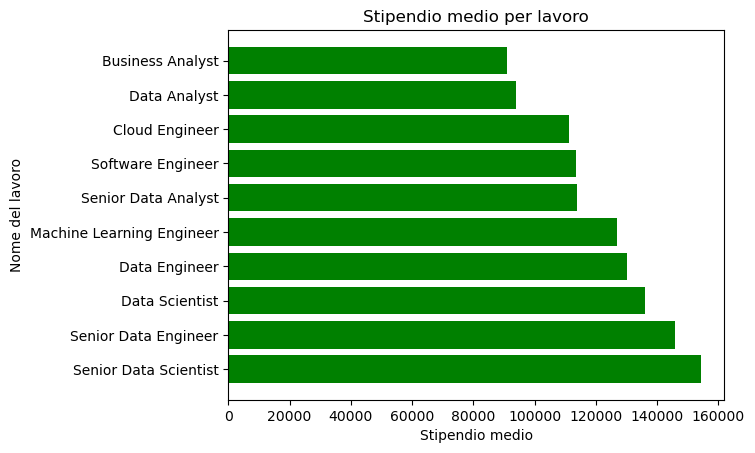

In [192]:
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#print('Lo stipendio medio annuale',df.groupby('job_country')['salary_year_avg'].sum())
#print('Il numero totale di offerte di lavoro',df['job_country'].value_counts())
#print('L’intervallo degli stipendi: valore minimo e massimo ',df.groupby('job_country')['salary_year_avg'].agg(['min', 'max']))


job_counts = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)


# imposta una dimensione più compatta

plt.xlabel('Stipendio medio')
plt.ylabel('Nome del lavoro')
plt.title('Stipendio medio per lavoro')
plt.barh(job_counts.index, job_counts,color='green')
plt.show()




